### Importing the dataset

In [ ]:
# Importing the dataset
import pandas as pd

# Load data from the CSV file
sales_df = pd.read_csv('sales.csv')

# Display the first few rows of the DataFrame
print(sales_df.head())

      DATE        PRODUCT GENDER SIZE  PIECES     RATE    TOTAL
0  5/1/2023   FRILL DRESS      F    M      30  1796.80  53904.0
1  5/2/2023         SHIRT      M    M      30  1632.00  48960.0
2  5/3/2023   FRILL DRESS      F   XL      50  1841.60  92080.0
3  5/4/2023  3 TIER DRESS      F    M      30  1441.28  43238.4
4  5/5/2023       TROUSER      M    M      20  1200.00  24000.0


In [ ]:
sales_df.columns

Index(['DATE ', ' PRODUCT', 'GENDER', 'SIZE', 'PIECES', 'RATE', 'TOTAL'], dtype='object')

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      123 non-null    object 
 1    PRODUCT  123 non-null    object 
 2   GENDER    123 non-null    object 
 3   SIZE      123 non-null    object 
 4   PIECES    123 non-null    int64  
 5   RATE      123 non-null    float64
 6   TOTAL     123 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ KB


### Cleaning and pre-processing the data


In [ ]:
# Noticed that in date column name an extra whitespace character was present and it was not in correct datetime format
# Remove leading/trailing spaces from column names
sales_df.columns = sales_df.columns.str.strip()

# Display the column names to verify the exact names
print(sales_df.columns)

Index(['DATE', 'PRODUCT', 'GENDER', 'SIZE', 'PIECES', 'RATE', 'TOTAL'], dtype='object')


In [ ]:
# Convert 'DATE' column to datetime format
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'], format='%m/%d/%Y', errors='coerce')

# Check the data types after conversion
print(sales_df.dtypes)

DATE       datetime64[ns]
PRODUCT            object
GENDER             object
SIZE               object
PIECES              int64
RATE              float64
TOTAL             float64
dtype: object


In [ ]:
sales_df.head()

,DATE,PRODUCT,GENDER,SIZE,PIECES,RATE,TOTAL
0,2023-05-01,FRILL DRESS,F,M,30,1796.80,53904.0
1,2023-05-02,SHIRT,M,M,30,1632.00,48960.0
2,2023-05-03,FRILL DRESS,F,XL,50,1841.60,92080.0
3,2023-05-04,3 TIER DRESS,F,M,30,1441.28,43238.4
4,2023-05-05,TROUSER,M,M,20,1200.00,24000.0


### Descriptive Statistics

In [ ]:
# Descriptive statistics
sales_df.describe()

,PIECES,RATE,TOTAL
count,123.000000,123.000000,123.000000
mean,48.089431,1601.312520,48602.796748
std,178.207744,702.228302,33907.406863
min,10.000000,160.000000,16000.000000
25%,17.500000,1328.000000,24720.000000
50%,30.000000,1600.000000,41760.000000
75%,50.000000,1760.000000,64060.000000
max,2000.000000,4000.000000,320000.000000


### Most sold product

In [ ]:
# Calculate total quantities sold for each product
product_quantities_sold = sales_df.groupby('PRODUCT')['PIECES'].sum().sort_values(ascending=False)

# Display the most sold products
print("Most Sold Products (by total quantity):")
print(product_quantities_sold.head())  # Display the top products by quantity


Most Sold Products (by total quantity):
PRODUCT
SCRUNCHIE    2000
SHIRT         570
SKIRT         530
TOPS          370
BATHROBE      350
Name: PIECES, dtype: int64


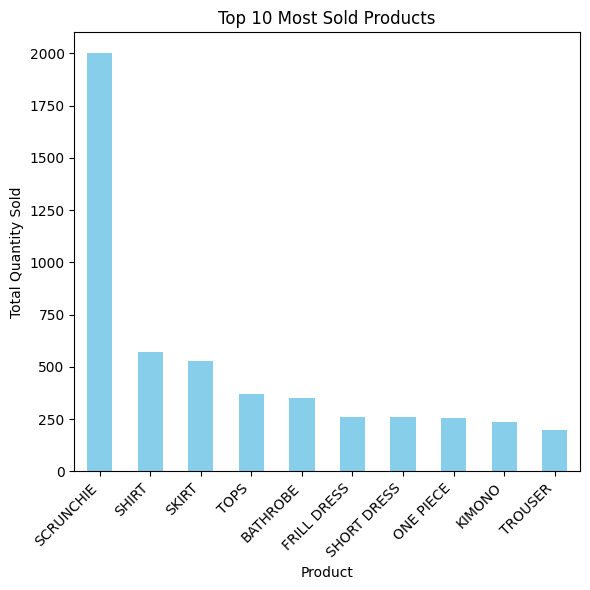

In [ ]:
import matplotlib.pyplot as plt

# Plotting the most sold products
plt.figure(figsize=(6, 6))
product_quantities_sold.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-11-28f854bf7119>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(monthly_sales_amounts.index, rotation=45, ha='right')


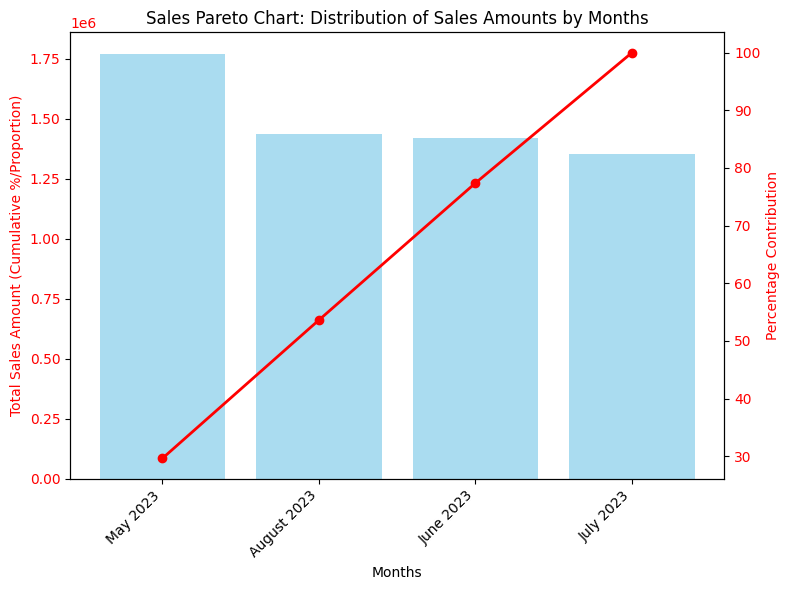

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DATE' column to datetime if it's not already in datetime format
sales_df['DATE'] = pd.to_datetime(sales_df['DATE'])

# Extract month and year from the 'DATE' column
sales_df['Month'] = sales_df['DATE'].dt.strftime('%B %Y')  # Month and Year format

# Grouping sales by month and calculating total sales for each month
monthly_sales_amounts = sales_df.groupby('Month')['TOTAL'].sum().sort_values(ascending=False)

# Calculate cumulative sum of sales amounts
cumulative_sales_amounts = monthly_sales_amounts.cumsum()

# Calculate the percentage of total sales amounts
total_sales = cumulative_sales_amounts.iloc[-1]
percentage_contribution = (cumulative_sales_amounts / total_sales) * 100

# Plotting the Sales Pareto Chart
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(monthly_sales_amounts.index, monthly_sales_amounts, color='skyblue', alpha=0.7)
ax1.set_xlabel('Months')
ax1.set_ylabel('Total Sales Amount (Cumulative %/Proportion)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(monthly_sales_amounts.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(monthly_sales_amounts.index, percentage_contribution, color='red', marker='o', linestyle='-', linewidth=2.0)
ax2.set_ylabel('Percentage Contribution', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Sales Pareto Chart: Distribution of Sales Amounts by Months')
plt.tight_layout()
plt.show()


### Gender and size analysis

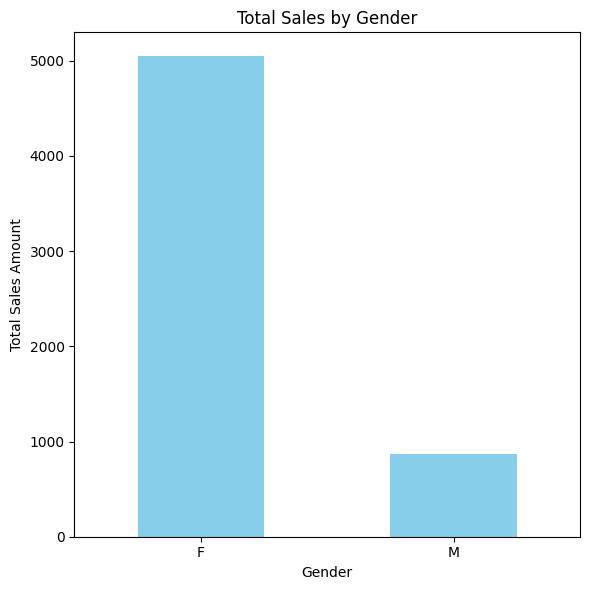

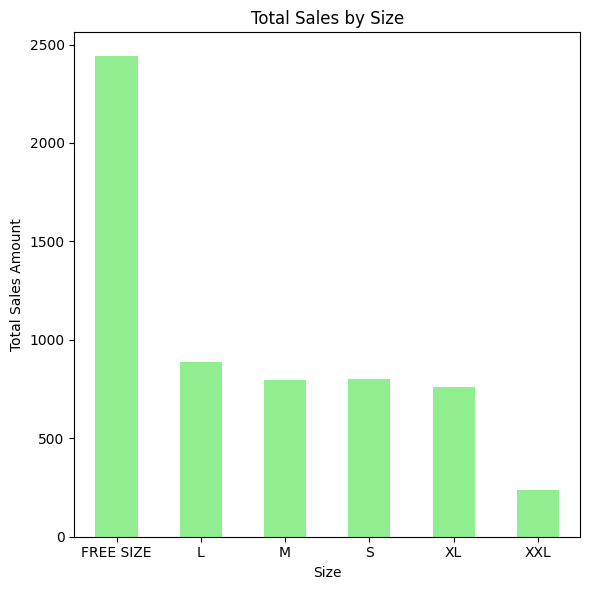

In [ ]:
import matplotlib.pyplot as plt

# Gender Analysis for Sales Data
gender_sales = sales_df.groupby('GENDER')['PIECES'].sum()

plt.figure(figsize=(6, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Size Analysis for Sales Data
size_sales = sales_df.groupby('SIZE')['PIECES'].sum()
plt.figure(figsize=(6, 6))
size_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Size')
plt.xlabel('Size')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


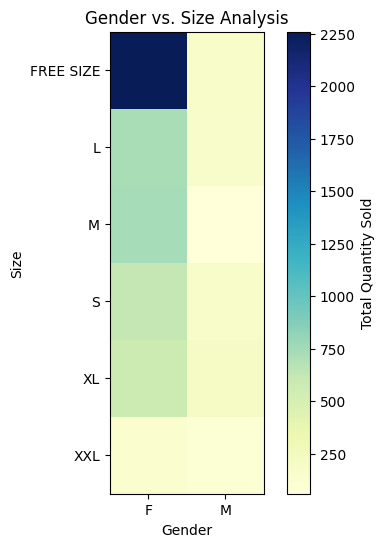

In [ ]:
# Create a pivot table to analyze quantities sold for different sizes based on gender
gender_size_analysis = sales_df.pivot_table(index='SIZE', columns='GENDER', values='PIECES', aggfunc='sum')

# Plotting a heatmap for Gender vs. Size analysis
plt.figure(figsize=(6, 6))
plt.imshow(gender_size_analysis, cmap='YlGnBu', interpolation='nearest')
plt.title('Gender vs. Size Analysis')
plt.xlabel('Gender')
plt.ylabel('Size')
plt.colorbar(label='Total Quantity Sold')
plt.xticks(range(len(gender_size_analysis.columns)), gender_size_analysis.columns)
plt.yticks(range(len(gender_size_analysis.index)), gender_size_analysis.index)
plt.show()

### Price disribution analysis

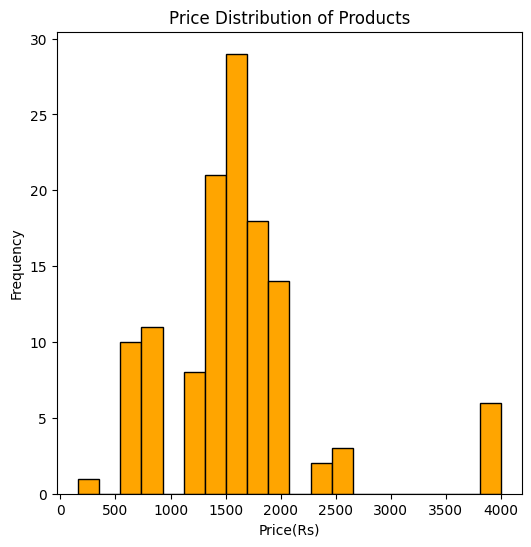

In [ ]:
# Plotting the distribution of prices
plt.figure(figsize=(6, 6))
plt.hist(sales_df['RATE'], bins=20, color='orange', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price(Rs)')
plt.ylabel('Frequency')
plt.show()

### Time series analysis

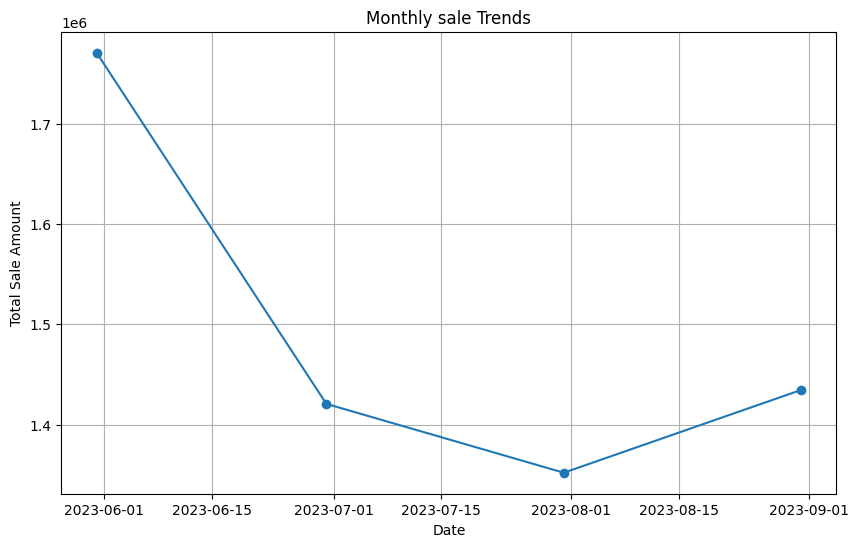

In [ ]:
# Set 'DATE' as the index (if not already set)
sales_df.set_index('DATE', inplace=True)

# Resample data by month and sum total purchases
monthly_sale = sales_df.resample('M')['TOTAL'].sum()

# Plotting monthly purchase trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sale.index, monthly_sale.values, marker='o', linestyle='-')
plt.title('Monthly sale Trends')
plt.xlabel('Date')
plt.ylabel('Total Sale Amount')
plt.grid(True)
plt.show()

### Sales forecasting

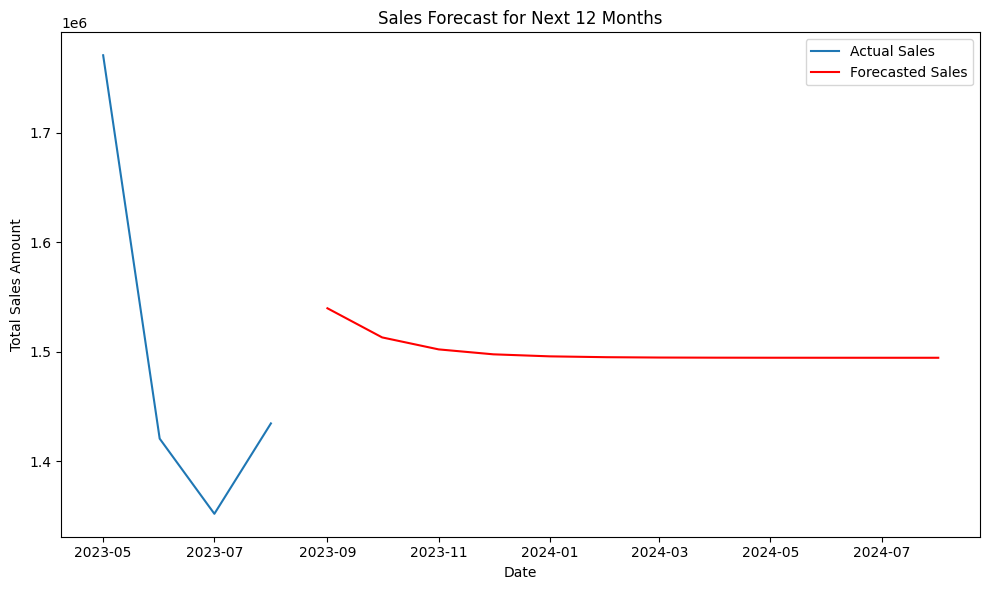

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert 'DATE' column to datetime if it's not already in datetime format
#sales_df['DATE'] = pd.to_datetime(sales_df['DATE'])

# Aggregate sales by date
daily_sales = sales_df.groupby('DATE')['TOTAL'].sum()

# Resample daily sales data to monthly frequency ('MS' represents start of the month)
monthly_sales = daily_sales.resample('MS').sum()

# Fit ARIMA model to the sales data
model = ARIMA(monthly_sales, order=(1, 0, 1))  # Example order, can be adjusted
model_fit = model.fit()

# Forecast sales for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plotting the sales forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.tight_layout()
plt.show()
